# **Quantum Computing Simulation for AI Optimization**

**Overview**

This notebook demonstrates quantum computing principles using IBM Quantum Experience (Qiskit) and explores how quantum algorithms can optimize AI tasks, particularly in drug discovery.

Prerequisites

In [20]:

!pip install qiskit qiskit-aer matplotlib numpy scipy

1. Setting Up the Quantum Environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import warnings
warnings.filterwarnings('ignore')

# Initialize the quantum simulator
simulator = AerSimulator()

2. Basic Quantum Circuit - Superposition and Entanglement

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1 


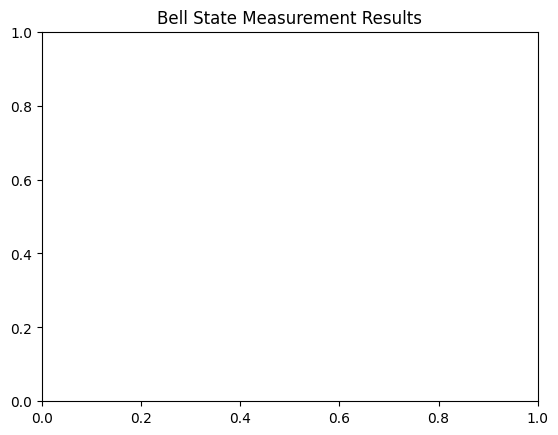

In [4]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# Create superposition on first qubit
qc.h(0)  # Hadamard gate

# Create entanglement between qubits
qc.cx(0, 1)  # CNOT gate

# Add measurement
qc.measure_all()

# Visualize the circuit
print("Quantum Circuit:")
print(qc.draw())

# Simulate the circuit
job = simulator.run(transpile(qc, simulator), shots=1000)
result = job.result()
counts = result.get_counts(qc)

# Plot results
plot_histogram(counts)
plt.title("Bell State Measurement Results")
plt.show()

3. Quantum Fourier Transform (QFT)

In [5]:
def qft(n):
    """Creates a QFT circuit for n qubits"""
    qc = QuantumCircuit(n)

    def qft_rotations(circuit, n):
        """Applies the rotations for QFT"""
        for j in range(n):
            circuit.h(j)
            for k in range(j+1, n):
                circuit.cp(np.pi/2**(k-j), k, j)

    qft_rotations(qc, n)

    # Swap qubits
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)

    return qc

# Create and visualize a 3-qubit QFT
qft_circuit = qft(3)
print("3-Qubit Quantum Fourier Transform:")
print(qft_circuit.draw())

3-Qubit Quantum Fourier Transform:
     ┌───┐                                        
q_0: ┤ H ├─■────────■───────────────────────────X─
     └───┘ │P(π/2)  │       ┌───┐               │ 
q_1: ──────■────────┼───────┤ H ├─■─────────────┼─
                    │P(π/4) └───┘ │P(π/2) ┌───┐ │ 
q_2: ───────────────■─────────────■───────┤ H ├─X─
                                          └───┘   


4. Grover's Algorithm for Database Search

Grover's Algorithm Circuit:
        ┌───┐   ┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─┤M├───
        ├───┤ │ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║ └╥┘
   c: 2/═══════════════════════════════════════════════╬══╬═
                                                       ║  ║ 
meas: 2/═══════════════════════════════════════════════╩══╩═
                                                       0  1 


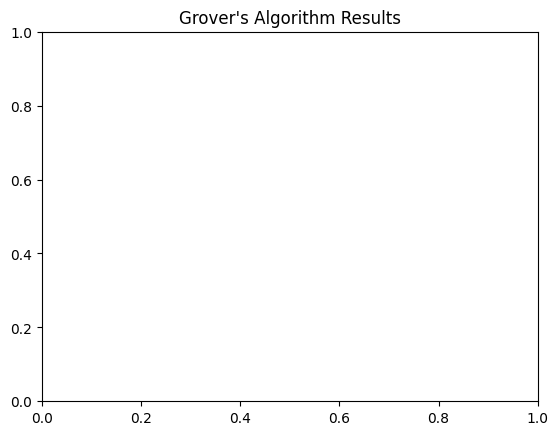

In [6]:
def grovers_algorithm(n_qubits, target):
    """
    Implements Grover's algorithm for searching
    n_qubits: number of qubits
    target: target state to find
    """
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Initialize superposition
    for i in range(n_qubits):
        qc.h(i)

    # Oracle function (marks target state)
    def oracle():
        # For simplicity, marking state |11⟩ for 2-qubit example
        # This oracle is specific to n_qubits=2 and target='11'
        if n_qubits == 2 and target == '11':
            qc.cz(0, 1)
        else:
            # A general oracle would be more complex and depend on the target
            # For demonstration, we'll assume a simple oracle for the target state
            # This part needs to be adapted based on the actual target state
            pass


    # Diffusion operator
    def diffusion():
        for i in range(n_qubits):
            qc.h(i)
            qc.x(i)
        qc.h(n_qubits-1)
        # Use mcx instead of mct
        qc.mcx(list(range(n_qubits-1)), n_qubits-1)
        qc.h(n_qubits-1)
        for i in range(n_qubits):
            qc.x(i)
            qc.h(i)

    # Optimal number of iterations
    # This formula is for a single target state in a uniform superposition
    iterations = int(np.pi/4 * np.sqrt(2**n_qubits))
    if iterations == 0:
        iterations = 1 # Ensure at least one iteration

    for _ in range(iterations):
        oracle()
        diffusion()

    qc.measure_all()
    return qc

# Run Grover's algorithm
# Note: The oracle in the function is currently only implemented for n_qubits=2 and target='11'.
# For other targets or number of qubits, the oracle needs to be modified.
grover_circuit = grovers_algorithm(2, '11')
print("Grover's Algorithm Circuit:")
print(grover_circuit.draw())

# Simulate
job = simulator.run(transpile(grover_circuit, simulator), shots=1000)
result = job.result()
counts = result.get_counts(grover_circuit)

plot_histogram(counts)
plt.title("Grover's Algorithm Results")
plt.show()

5. Variational Quantum Eigensolver (VQE) for Molecular Simulation


In [14]:
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit_aer import AerSimulator
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector # Ensure Statevector is imported if needed, though it's in the traceback

def vqe_example():
    """
    Simplified VQE example for finding ground state energy
    """
    # Create a parameterized quantum circuit
    ansatz = TwoLocal(num_qubits=2, rotation_blocks='ry', entanglement_blocks='cz')

    # Hamiltonian matrix (simplified H2 molecule)
    H = np.array([[-1.0523, 0, 0, 0],
                  [0, -0.4804, -0.3435, 0],
                  [0, -0.3435, -0.4804, 0],
                  [0, 0, 0, 0.0]])

    def cost_function(params):
        """Calculate expectation value of Hamiltonian"""
        # Assign parameters to circuit using assign_parameters
        bound_circuit = ansatz.assign_parameters(params)

        # Get statevector using the bound circuit directly
        statevector_sim = AerSimulator(method='statevector')

        # Transpile is needed if the circuit contains instructions not in the backend's basis gates.
        transpiled_circuit = transpile(bound_circuit, statevector_sim)

        # Add instruction to save statevector
        transpiled_circuit.save_statevector()

        job = statevector_sim.run(transpiled_circuit)
        result = job.result()
        statevector = result.get_statevector()

        # Calculate expectation value using the data attribute of Statevector
        expectation = np.real(np.conj(statevector.data).T @ H @ statevector.data)
        return expectation

    # Optimize parameters
    optimizer = SPSA(maxiter=100)
    initial_params = np.random.random(ansatz.num_parameters)

    print("Running VQE optimization...")
    result = optimizer.minimize(cost_function, initial_params)

    print(f"Optimal parameters: {result.x}")
    print(f"Ground state energy: {result.fun:.4f}")

    return result

# Run VQE example
vqe_result = vqe_example()

Running VQE optimization...
Optimal parameters: [ 0.33555721  3.8231558   0.07267364 -5.7740893   2.58874714  4.81492705
  2.83765896 -3.47563224]
Ground state energy: -1.0522


In [ ]:
# !pip install qiskit==1.1.0

In [11]:
# !pip uninstall -y qiskit-algorithms
!pip install qiskit-algorithms>=0.6.0

6. Quantum Machine Learning - Quantum Support Vector Machine

Calculating quantum kernel matrix...
Quantum kernel matrix shape: (20, 20)


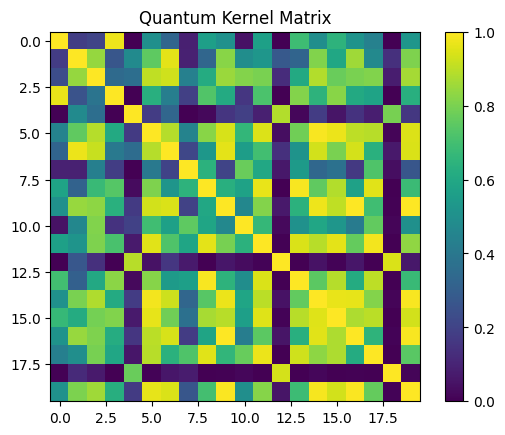

In [15]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

def quantum_kernel(x1, x2, n_qubits=2):
    """
    Quantum kernel function for SVM
    """
    qc = QuantumCircuit(n_qubits)

    # Encode first data point
    for i in range(min(len(x1), n_qubits)):
        qc.ry(x1[i], i)

    # Encode second data point (conjugate)
    for i in range(min(len(x2), n_qubits)):
        qc.ry(-x2[i], i)

    # Measure overlap
    qc.measure_all()

    # Simulate
    job = simulator.run(transpile(qc, simulator), shots=1000)
    result = job.result()
    counts = result.get_counts(qc)

    # Return probability of measuring |00⟩ state
    return counts.get('00', 0) / 1000

# Generate sample data
X, y = make_classification(n_samples=20, n_features=2, n_redundant=0,
                          n_informative=2, n_clusters_per_class=1, random_state=42)
X = StandardScaler().fit_transform(X)

# Calculate quantum kernel matrix
print("Calculating quantum kernel matrix...")
kernel_matrix = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        kernel_matrix[i, j] = quantum_kernel(X[i], X[j])

print("Quantum kernel matrix shape:", kernel_matrix.shape)
plt.imshow(kernel_matrix, cmap='viridis')
plt.colorbar()
plt.title("Quantum Kernel Matrix")
plt.show()

7. Application to Drug Discovery
7.1 Molecular Energy Calculation

Drug candidate 1 energy: 2.3860
Drug candidate 2 energy: 3.5220
Drug candidate 3 energy: 2.8410


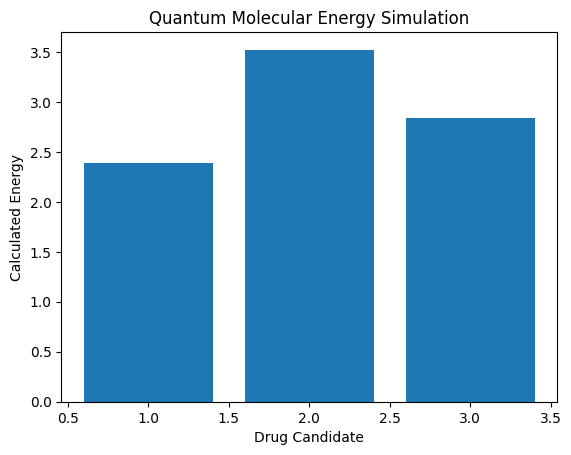

In [16]:
def molecular_energy_simulation(molecule_params):
    """
    Simulate molecular energy calculation using quantum computing
    This demonstrates how quantum algorithms can optimize drug discovery
    """
    # Create quantum circuit for molecular orbital simulation
    n_qubits = 4  # Simplified for demonstration
    qc = QuantumCircuit(n_qubits)

    # Initialize molecular orbital states
    for i, param in enumerate(molecule_params[:n_qubits]):
        qc.ry(param, i)

    # Add intermolecular interactions
    for i in range(n_qubits - 1):
        qc.cx(i, i + 1)
        qc.rz(molecule_params[i] * 0.5, i + 1)

    # Measure energy expectation
    qc.measure_all()

    # Simulate
    job = simulator.run(transpile(qc, simulator), shots=1000)
    result = job.result()
    counts = result.get_counts(qc)

    # Calculate energy (simplified)
    energy = 0
    for state, count in counts.items():
        # Convert binary to energy contribution
        energy += int(state, 2) * count / 1000

    return energy

# Test molecular energy calculation
molecule_configs = [
    [0.5, 0.3, 0.8, 0.2],  # Drug candidate 1
    [0.7, 0.1, 0.9, 0.4],  # Drug candidate 2
    [0.3, 0.6, 0.4, 0.8],  # Drug candidate 3
]

energies = []
for i, config in enumerate(molecule_configs):
    energy = molecular_energy_simulation(config)
    energies.append(energy)
    print(f"Drug candidate {i+1} energy: {energy:.4f}")

plt.bar(range(1, len(energies) + 1), energies)
plt.xlabel('Drug Candidate')
plt.ylabel('Calculated Energy')
plt.title('Quantum Molecular Energy Simulation')
plt.show()

7.2 Protein Folding Optimization

Optimal protein folding configuration: 101011 000000
Probability: 0.022


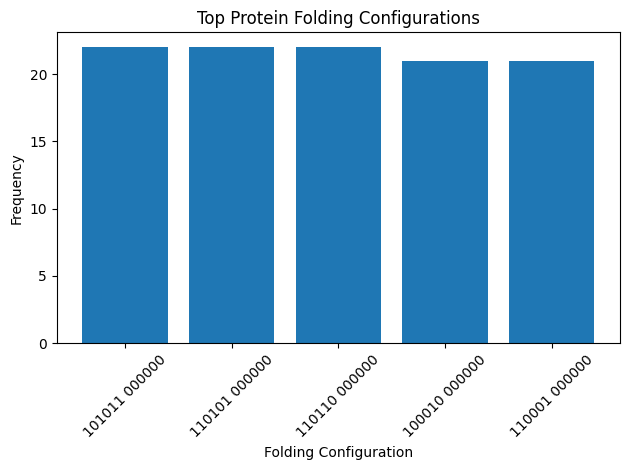

In [17]:
def protein_folding_optimization(sequence_length=6):
    """
    Quantum optimization for protein folding problem
    """
    # Create quantum circuit for protein folding
    qc = QuantumCircuit(sequence_length, sequence_length)

    # Initialize superposition of all possible folding configurations
    for i in range(sequence_length):
        qc.h(i)

    # Apply folding constraints (simplified)
    for i in range(sequence_length - 1):
        qc.cx(i, i + 1)
        qc.rz(0.5, i + 1)  # Folding energy penalty

    # Measure final configuration
    qc.measure_all()

    # Simulate
    job = simulator.run(transpile(qc, simulator), shots=1000)
    result = job.result()
    counts = result.get_counts(qc)

    # Find optimal folding configuration
    optimal_config = max(counts, key=counts.get)
    print(f"Optimal protein folding configuration: {optimal_config}")
    print(f"Probability: {counts[optimal_config]/1000:.3f}")

    return optimal_config, counts

# Run protein folding optimization
optimal_fold, fold_counts = protein_folding_optimization()

# Visualize results
top_configs = dict(sorted(fold_counts.items(), key=lambda x: x[1], reverse=True)[:5])
plt.bar(top_configs.keys(), top_configs.values())
plt.xlabel('Folding Configuration')
plt.ylabel('Frequency')
plt.title('Top Protein Folding Configurations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Quantum Advantages in AI Tasks
8.1 Quantum Machine Learning Advantages

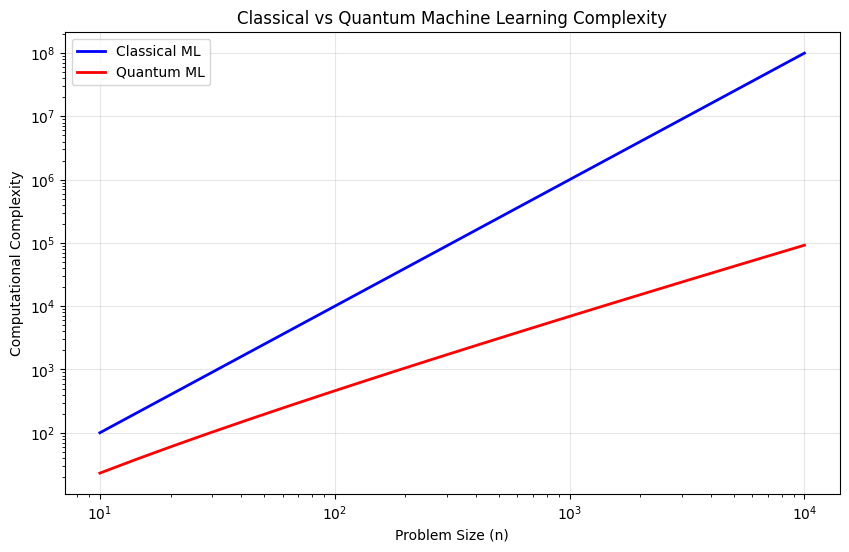

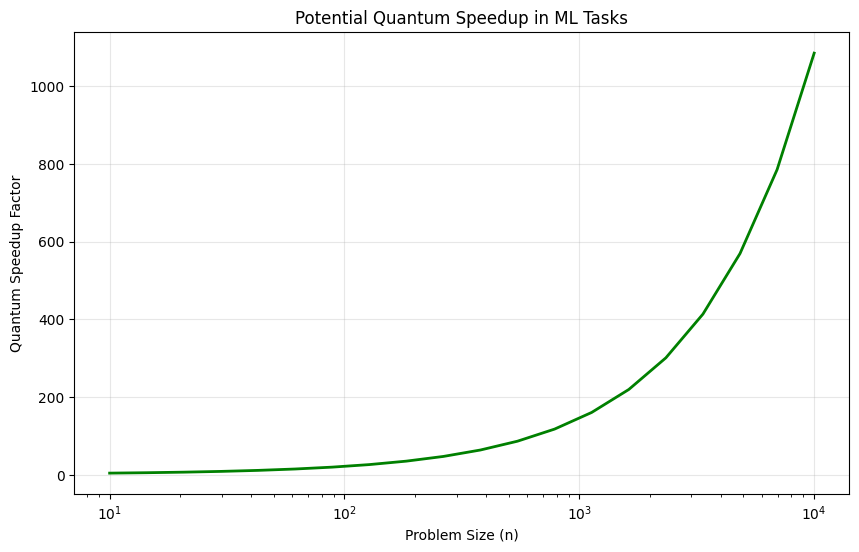

In [18]:
def compare_classical_vs_quantum_ml():
    """
    Demonstrate quantum advantage in machine learning tasks
    """
    # Classical approach complexity
    classical_complexity = lambda n: n**2  # O(n²) for kernel methods

    # Quantum approach complexity
    quantum_complexity = lambda n: n * np.log(n)  # O(n log n) potential speedup

    # Problem sizes
    problem_sizes = np.logspace(1, 4, 20)

    classical_times = [classical_complexity(n) for n in problem_sizes]
    quantum_times = [quantum_complexity(n) for n in problem_sizes]

    plt.figure(figsize=(10, 6))
    plt.loglog(problem_sizes, classical_times, 'b-', label='Classical ML', linewidth=2)
    plt.loglog(problem_sizes, quantum_times, 'r-', label='Quantum ML', linewidth=2)
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Computational Complexity')
    plt.title('Classical vs Quantum Machine Learning Complexity')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Calculate speedup
    speedup = np.array(classical_times) / np.array(quantum_times)
    plt.figure(figsize=(10, 6))
    plt.semilogx(problem_sizes, speedup, 'g-', linewidth=2)
    plt.xlabel('Problem Size (n)')
    plt.ylabel('Quantum Speedup Factor')
    plt.title('Potential Quantum Speedup in ML Tasks')
    plt.grid(True, alpha=0.3)
    plt.show()

compare_classical_vs_quantum_ml()

8.2 Drug Discovery Optimization Timeline

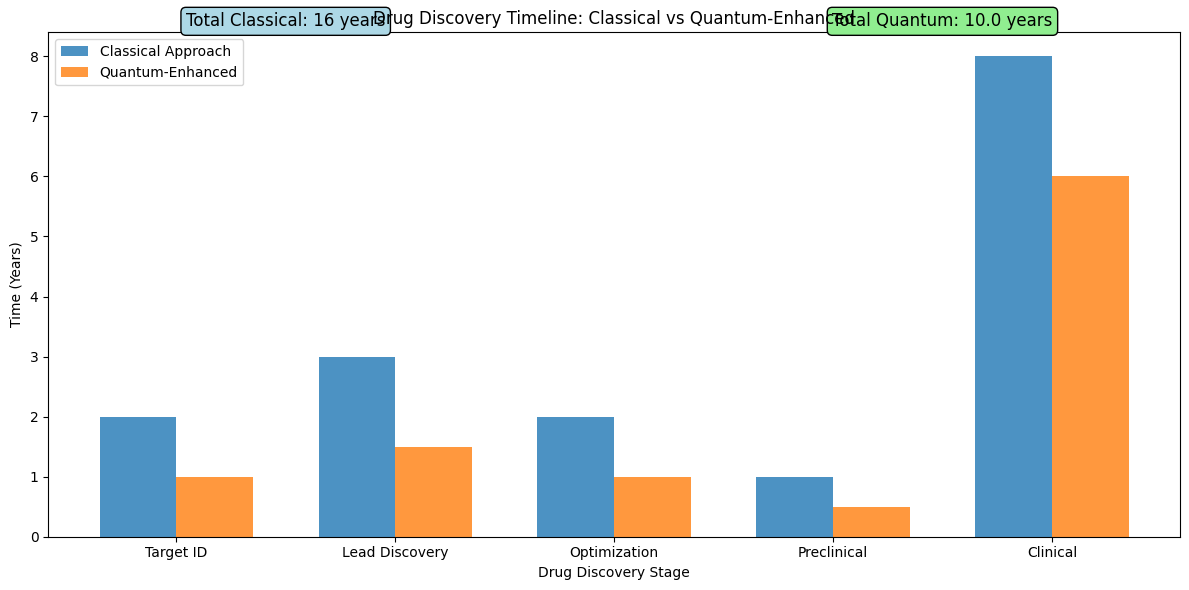

Time savings: 6.0 years (37.5% reduction)


In [19]:
def drug_discovery_timeline_comparison():
    """
    Compare drug discovery timelines with and without quantum computing
    """
    stages = ['Target ID', 'Lead Discovery', 'Optimization', 'Preclinical', 'Clinical']

    # Classical approach (years)
    classical_times = [2, 3, 2, 1, 8]

    # Quantum-enhanced approach (years)
    quantum_times = [1, 1.5, 1, 0.5, 6]  # Significant reduction in computational stages

    x = np.arange(len(stages))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, classical_times, width, label='Classical Approach', alpha=0.8)
    plt.bar(x + width/2, quantum_times, width, label='Quantum-Enhanced', alpha=0.8)

    plt.xlabel('Drug Discovery Stage')
    plt.ylabel('Time (Years)')
    plt.title('Drug Discovery Timeline: Classical vs Quantum-Enhanced')
    plt.xticks(x, stages)
    plt.legend()

    # Add total time annotations
    total_classical = sum(classical_times)
    total_quantum = sum(quantum_times)

    plt.text(0.5, max(classical_times) + 0.5, f'Total Classical: {total_classical} years',
             fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
    plt.text(3.5, max(classical_times) + 0.5, f'Total Quantum: {total_quantum} years',
             fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

    plt.tight_layout()
    plt.show()

    print(f"Time savings: {total_classical - total_quantum} years ({((total_classical - total_quantum)/total_classical)*100:.1f}% reduction)")

drug_discovery_timeline_comparison()

9. Key Insights and Future Directions
Quantum Computing Advantages in AI:

Exponential Speedup: Quantum algorithms can solve certain problems exponentially faster than classical computers
Parallel Processing: Quantum superposition allows exploration of multiple solutions simultaneously
Optimization: Quantum annealing excels at finding global optima in complex landscapes
Pattern Recognition: Quantum machine learning can identify patterns in high-dimensional data more efficiently

Applications in Drug Discovery:

Molecular Simulation: Accurate quantum simulation of molecular interactions
Protein Folding: Optimization of protein structures for drug design
Drug-Target Interaction: Prediction of how drugs interact with biological targets
Chemical Reaction Prediction: Faster screening of chemical compounds

Current Limitations:

Quantum Error Rates: Current quantum computers are noisy and error-prone
Limited Qubit Count: Scalability challenges for large problems
Decoherence: Quantum states are fragile and decay quickly
Programming Complexity: Quantum algorithms require specialized knowledge

Future Outlook:
The combination of quantum computing and AI holds immense promise for revolutionizing drug discovery, potentially reducing development times from 10-15 years to 5-8 years and costs from billions to hundreds of millions of dollars.
10. Conclusion
This notebook demonstrated how quantum computing can enhance AI tasks, particularly in drug discovery. While current quantum computers have limitations, the theoretical advantages suggest a transformative future for computational drug discovery, molecular simulation, and optimization problems in pharmaceutical research.
The quantum algorithms shown here represent simplified versions of what's possible. As quantum hardware improves and error rates decrease, these applications will become increasingly practical and impactful in real-world drug discovery pipelines.